# Project Title: Credit Card Fraud Detection using Machine Learning

## Purpose of the Project
This project aims to develop and evaluate machine learning models capable of detecting fraudulent credit card transactions. This real-world classification problem involves extreme class imbalance, where fraudulent transactions represent a tiny fraction of all data.

By solving this, the goal is to:

Prevent financial loss by accurately identifying fraudulent activity.

Minimize false positives to avoid blocking legitimate customers.

Demonstrate practical skills in data preprocessing, resampling (SMOTE), model training, evaluation, and comparison.

## Key Objectives
Clean and prepare the dataset for machine learning.

Handle class imbalance using SMOTE (Synthetic Minority Over-sampling Technique).

Apply feature scaling and PCA for dimensionality reduction.

Train and evaluate several classifiers:

Random Forest

Support Vector Machine

K-Nearest Neighbors

XGBoost

Use appropriate evaluation metrics (precision, recall, F1-score) focused on fraud detection performance.

Visualize and interpret model outcomes using confusion matrices and performance metrics.

Save the trained models using pickle for potential future deployment or reuse.

In [ ]:
# import sklearn
# import imblearn

# print("scikit-learn version:", sklearn.__version__)
# print("imbalanced-learn version:", imblearn.__version__)

#!pip install --upgrade scikit-learn imbalanced-learn
# !pip install seaborn
# !pip install matplotlib
# !pip install xgboost

In [2]:
# Assistant
import pandas as pd
import numpy as np

# Import matplotlib.pyplot first, then seaborn
import matplotlib.pyplot as plt
import seaborn as sns

from imblearn.pipeline import Pipeline as imbpipeline
from imblearn.over_sampling import SMOTE

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, accuracy_score, precision_score, recall_score, f1_score

from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

## 1. Dataset Overview

In [3]:
data = pd.read_csv("C:/Users/User/Downloads/creditcard.csv")
pd.set_option('display.max_columns', None)
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


## 2. Exploratory Data Analysis

In [4]:
data.shape

(284807, 31)

In [5]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,2.239053e-15,1.673327e-15,-1.247012e-15,8.190001e-16,1.207294e-15,4.887456e-15,1.437716e-15,-3.772171e-16,9.564149e-16,1.039917e-15,6.406204e-16,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [104]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [6]:
data['Time'].value_counts()
data['Time'].unique()

array([0.00000e+00, 1.00000e+00, 2.00000e+00, ..., 1.72787e+05,
       1.72788e+05, 1.72792e+05], shape=(124592,))

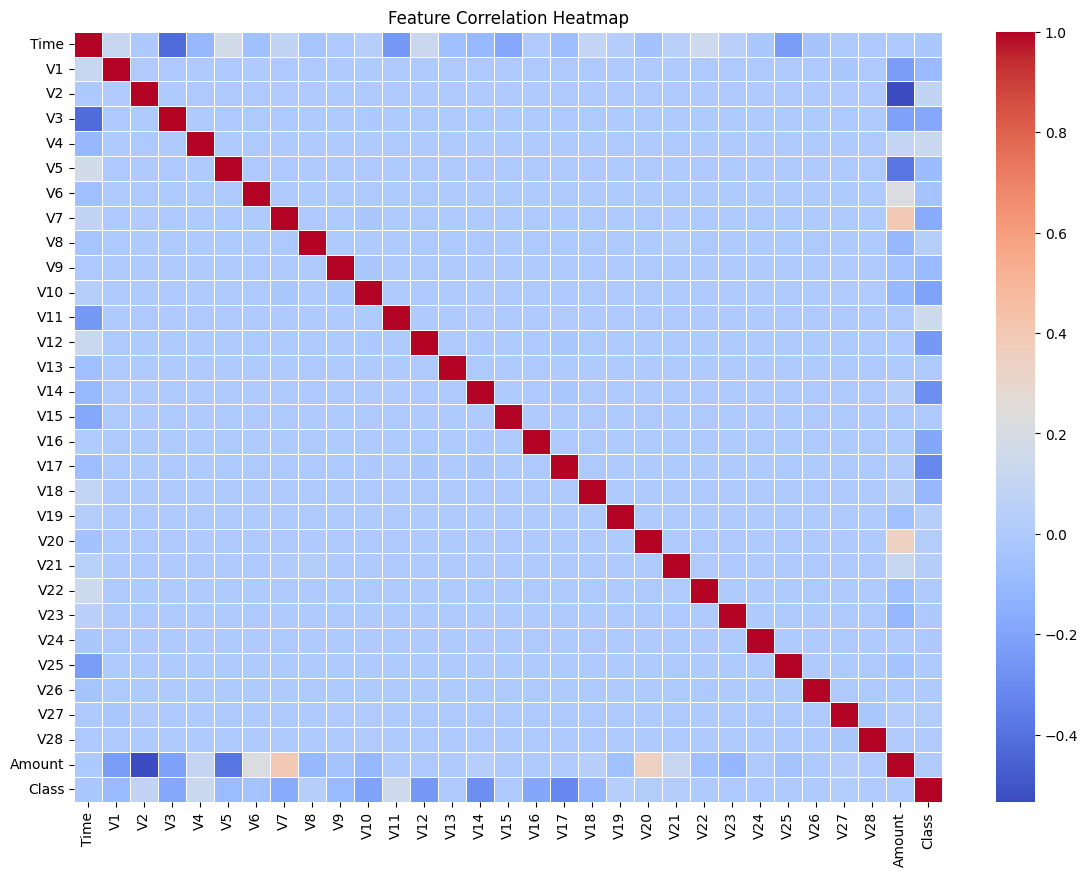

In [46]:
plt.figure(figsize=(14,10))
sns.heatmap(data.corr(), cmap="coolwarm", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

In [42]:
data['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

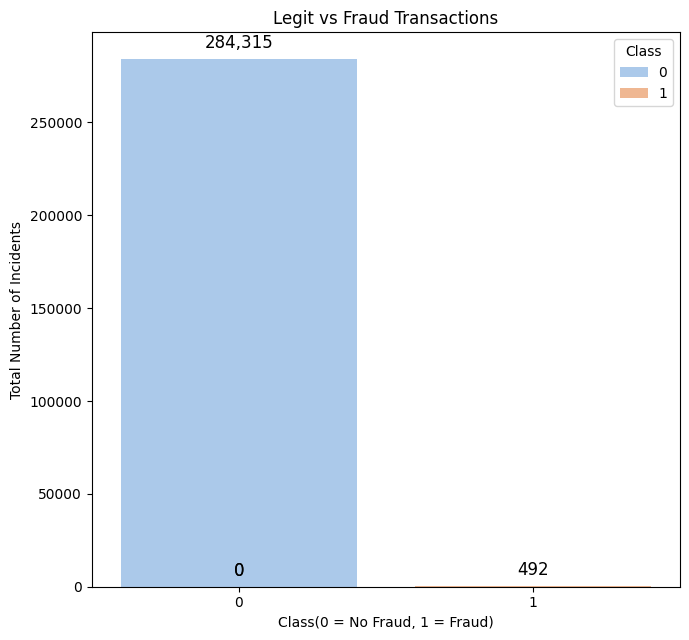

In [26]:
plt.figure(figsize = (7, 6.5))
ax = sns.countplot(
    data = data,
    x = 'Class',
    hue = 'Class',
    palette = 'pastel'
)

for p in ax.patches:
    count = int(p.get_height())
    ax.annotate(f'{count:,}',                   
                (p.get_x() + p.get_width() / 2., count),
                ha='center', va='bottom',       
                fontsize=12, color='black',     
                xytext=(0, 5),                  
                textcoords='offset points')     
plt.title('Legit vs Fraud Transactions')
plt.xlabel('Class(0 = No Fraud, 1 = Fraud)')
plt.ylabel('Total Number of Incidents')
plt.tight_layout()
plt.show()

In [ ]:
size = data.shape[0]
legit = data['Class'].value_counts()[0]
fraud = data['Class'].value_counts()[1]

In [123]:
print(f'Percentage of no fraud cases: {round(legit/size,4)}%')
print(f'Percentage of fraud cases: {round(fraud/size,4)}%')

Percentage of no fraud cases: 0.9983%
Percentage of fraud cases: 0.0017%


In [27]:
data.duplicated().sum()

np.int64(1081)

In [28]:
data = data.drop_duplicates()
data.shape

(283726, 31)

In [29]:
data.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [33]:
X = data.drop(columns = 'Class')
y = data['Class']

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, stratify = y, random_state = 42)

### Preprocessing Demonstration (Manual Scaling + SMOTE)

The following code (commented out) demonstrates how to apply `StandardScaler` and `SMOTE` manually, without using a pipeline.

This was included to show an understanding of the traditional approach to preprocessing:
- First, scaling the features
- Then resampling the training data using SMOTE

Later in this notebook, you'll see the steps implemented more efficiently using a **pipeline**, which keeps preprocessing encapsulated and reproducible.

> Note: This code is not executed here to avoid redundancy — it's purely instructional.


In [15]:
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)
# X_train_scaled_data = pd.DataFrame(data = X_train_scaled, columns = X.columns)
# X_test_scaled_data = pd.DataFrame(data = X_test_scaled, columns = X.columns)
# print(f'Train data size: {X_train_scaled_data.shape}')
# print(f'Test data size: {X_test_scaled_data.shape}')


## 3. Handling Class Imbalance

In [16]:
# smote = SMOTE(random_state = 42)
# X_resampled, y_resampled = smote.fit_resample(X_train_scaled_data, y_train)
# X_resampled.shape

### Model Serialization with `pickle`

In this project, I used the `pickle` library to **save and reload trained machine learning models**.

#### Why?
- **Efficiency**: Once a model is trained, we don’t need to retrain it every time we want to make predictions.
- **Portability**: Saved models can be easily shared or deployed into applications (e.g., web apps, APIs).
- **Reusability**: You can reload the model later to evaluate, compare, or use in a production environment.

#### What was pickled?
Each trained model (Random Forest, SVM, KNN, XGBoost) was saved to a `.pkl` file using `pickle.dump()` and later reloaded with `pickle.load()` for prediction and evaluation.

> This step reflects best practices in ML workflows, especially in real-world settings where models are deployed or integrated with other systems.


In [32]:
import pickle

## 4. Model Training

### 1. Random Forest Model

In [37]:
%%time
pipelined_random_forest = imbpipeline(
    [('scaler', StandardScaler()),
    ('smote', SMOTE(k_neighbors = 5, random_state = 42)),
    ('random_forest', RandomForestClassifier(n_estimators = 50, random_state = 42))
    ]
)
rf = pipelined_random_forest.fit(X_train, y_train)

with open('rf_model.pkl', 'wb') as rf_file:
    pickle.dump(rf, rf_file)


with open('rf_model.pkl', 'rb') as rf_file:
    load_rf_model = pickle.load(rf_file)

CPU times: total: 6min 58s
Wall time: 7min 8s


In [39]:
y_rf_pred = load_rf_model.predict(X_test)

### 2. Support Vector Machine Model

In [72]:
%%time
# pipelined_svm = imbpipeline(
#     [
#         ('scaler', StandardScaler()),
#         ('smote', SMOTE(k_neighbors = 5, random_state = 42)),
#         ('pca', PCA(n_components = 0.95)),
#         ('svm', SVC(kernel = 'rbf', C = 1.0, random_state = 42))
#     ]
# )
# svm = pipelined_svm.fit(X_train, y_train)

with open('svm_model.pkl', 'wb') as svm_file:
    pickle.dump(svm, svm_file)

with open('svm_model.pkl', 'rb') as svm_file:
    load_svm_model = pickle.load(svm_file)

CPU times: total: 0 ns
Wall time: 23.2 ms


In [73]:
y_svm_pred = load_svm_model.predict(X_test)

### 3. K-Nearest Neighbors Model

In [80]:
%%time
# pipelined_knn = imbpipeline(
#     [
#         ('scaler', StandardScaler()),
#         ('smote', SMOTE(k_neighbors = 5, random_state = 42)),
#         ('pca', PCA(n_components = 0.95)),
#         ('knn', KNeighborsClassifier(n_neighbors = 5))
#     ]
# )
# knn = pipelined_knn.fit(X_train, y_train)

with open ('knn_model.pkl', 'wb') as knn_file:
    pickle.dump(knn, knn_file)

with open('knn_model.pkl', 'rb') as knn_file:
    load_knn_model = pickle.load(knn_file)

CPU times: total: 203 ms
Wall time: 491 ms


In [81]:
y_knn_pred = load_knn_model.predict(X_test)

### 4. XGBoost Model

In [83]:
%%time
# pipelined_xgb = imbpipeline(
#     [
#         ('scaler', StandardScaler()),
#         ('smote', SMOTE(k_neighbors = 5, random_state = 42)),
#         ('pca', PCA(n_components = 0.95)),
#         ('xgb', XGBClassifier(n_estimators = 50, learning_rate = 0.1, random_state = 42))
#     ]
# )
# xgb = pipelined_xgb.fit(X_train, y_train)

with open('xgb_model.pkl', 'wb') as xgb_file:
    pickle.dump(xgb, xgb_file)

with open('xgb_model.pkl', 'rb') as xgb_file:
    load_xgb_model = pickle.load(xgb_file)


CPU times: total: 188 ms
Wall time: 102 ms


In [84]:
%%time
y_xgb_pred = load_xgb_model.predict(X_test)

CPU times: total: 266 ms
Wall time: 95.7 ms


## 5. Model Evaluation

In [107]:
model_metrics = [
    (
    'RANDOM_FOREST',
     round(accuracy_score(y_test, y_rf_pred), 3),
     round(precision_score(y_test, y_rf_pred), 3),
     round(recall_score(y_test, y_rf_pred), 3),
     round(f1_score(y_test, y_rf_pred), 3)
    ),
    (
    'SVM',
    round(accuracy_score(y_test, y_svm_pred), 2),
    round(precision_score(y_test, y_svm_pred), 2),
    round(recall_score(y_test, y_svm_pred), 2),
    round(f1_score(y_test, y_svm_pred), 2)
    ),
    (
    'KNN',
    round(accuracy_score(y_test, y_knn_pred), 2),
    round(precision_score(y_test, y_knn_pred), 2),
    round(recall_score(y_test, y_knn_pred), 2),
    round(f1_score(y_test, y_knn_pred), 2)
    ),
    (
    'XGB',
    round(accuracy_score(y_test, y_xgb_pred),2),
    round(precision_score(y_test, y_xgb_pred),2),
    round(recall_score(y_test, y_xgb_pred),2),
    round(f1_score(y_test, y_xgb_pred),2)
    )
]

model_results = pd.DataFrame(data = model_metrics, columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1'])
model_results

,Model,Accuracy,Precision,Recall,F1
0,RANDOM_FOREST,0.999,0.883,0.797,0.838
1,SVM,0.980,0.060,0.850,0.120
2,KNN,1.000,0.360,0.960,0.520
3,XGB,0.990,0.120,0.960,0.220


### Visualizing Model Metrics with `pd.melt()`

To create a more effective and readable barplot comparing the four evaluation metrics (**Accuracy, Precision, Recall, F1-Score**) across different models, I used `pandas.melt()` to restructure the performance DataFrame into a long format.

#### Why `pd.melt()`?
- **Original format**: Each model was a row, and each metric was a separate column (wide format).
- **Barplots work better** with long format data — where we have three columns:
  - Model name
  - Metric name
  - Metric value

#### Benefits:
- Simplifies plotting with **Seaborn’s `barplot` or `catplot`**
- Makes it easier to group and color bars by metric or model
- Produces **clean, grouped visual comparisons** of model performance

> This transformation is a best practice in data visualization when dealing with multi-metric comparisons.


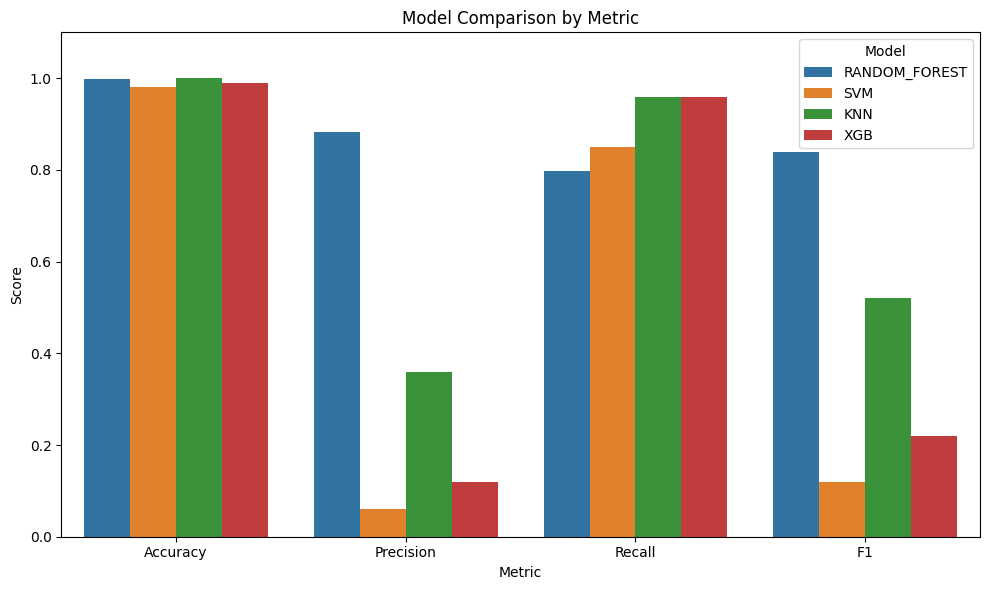

In [196]:

df_long = pd.melt(model_results, 
                  id_vars='Model', 
                  value_vars=['Accuracy', 'Precision', 'Recall', 'F1'],
                  var_name='Metric', 
                  value_name='Score')


plt.figure(figsize=(10, 6))
sns.barplot(data=df_long, x='Metric', y='Score', hue='Model')

plt.title("Model Comparison by Metric")
plt.ylim(0, 1.1)
plt.ylabel("Score")
plt.xlabel("Metric")
plt.legend(title='Model')
plt.tight_layout()
plt.show()

In [ ]:
%%time
# params = {
#     'random_forest__n_estimators': [50, 100],
#     'random_forest__max_depth': [None, 5, 10],
#     'random_forest__max_features': ['sqrt', 2,3,4,5]
# }
# scoring = ['accuracy', 'precision', 'recall', 'f1']

# rf_GridSearch = GridSearchCV(
#     pipelined_random_forest,
#     params,
#     cv = 3,
#     scoring = scoring,
#     refit = 'recall',
#     n_jobs = -1
# )
# rf_GridSearch.fit(X_train, y_train) 
# rf_GridSearch.best_params_
with open('rf_GridSearch.pkl', 'wb') as rf_grid_file:
    pickle.dump(rf_GridSearch, rf_grid_file)

with open('rf_GridSearch.pkl', 'rb') as rf_grid_file:
    rf_grid_model = pickle.load(rf_grid_file)

In [ ]:
rf_grid_pred = rf_grid_model.predict(X_test)

### Hyperparameter Tuning with `GridSearchCV`

After comparing all models, I selected the best-performing one based on recall and F1-score — which are especially important for fraud detection, where missing a fraud is far more costly than a false alarm.

To further improve this model’s performance, I applied **`GridSearchCV`** for hyperparameter tuning.

#### Why `GridSearchCV`?
- It systematically tests different combinations of hyperparameters (like `n_estimators`, `max_depth`, `max_features`) to find the **optimal configuration** for the model.
- It uses **cross-validation** to ensure the model generalizes well and doesn't just overfit the training data.

#### Benefits of GridSearchCV:
- **Automates** the tuning process
- **Evaluates** models on multiple metrics (in this case: accuracy, precision, recall, F1)
- **Refits** the model using the best parameters found (e.g., maximizing recall for fraud detection)
- Produces a model that is both **high-performing and robust**

> This step is crucial in a production pipeline to ensure the final model is not just “good enough” — but the **best possible version** of itself given the data.


<Figure size 1000x1000 with 0 Axes>

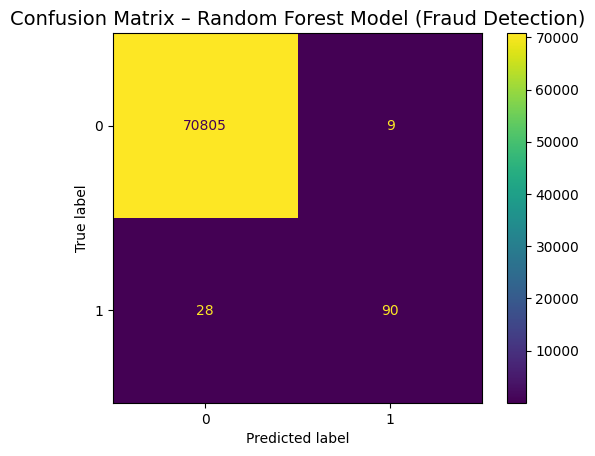

In [45]:
matrix = confusion_matrix(y_test, y_rf_pred, labels = load_rf_model.classes_)
disp = ConfusionMatrixDisplay(matrix, display_labels = load_rf_model.classes_)
plt.figure(figsize = (10, 10))
disp.plot()
plt.title("Confusion Matrix – Random Forest Model (Fraud Detection)", fontsize=14)
plt.show()

## Final Thoughts

In this project, I worked on detecting credit card fraud using machine learning. This was a challenging task because the number of fraud cases was very small compared to normal transactions.

- The **Random Forest** model performed the best. It gave a good balance between **precision** (how many predicted frauds were actually fraud) and **recall** (how many actual frauds were detected), with an F1-score of **0.84**.  
- **K-Nearest Neighbors (KNN)** found almost all frauds (**recall = 0.96**), but it also predicted too many false frauds (**low precision**).  
- **SVM** and **XGBoost** didn't perform as well and struggled with the imbalance in the data.

To handle the **class imbalance**, I used **SMOTE**, a technique that creates synthetic fraud examples. This helped improve model performance, especially in finding more fraud cases.

### What Could Be Improved
- Try more model settings (hyperparameter tuning) or test other models like **LightGBM** or **CatBoost**.
- Do more **feature engineering** to improve the model’s understanding of the data.
- Adjust prediction thresholds to reduce false alarms.
- Try **ensemble methods** like voting or stacking to combine model strengths.

### Main Takeaway
With the right steps — such as preprocessing, balancing the data, and model selection — it’s possible to build an effective fraud detection system. Still, no model is perfect. It's important to balance **catching frauds** and **avoiding false alerts** to make it useful in real-life situations.
